In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sns


In [38]:
df = pd.read_csv('wines_SPA.csv')
df = df.drop(columns=['winery','country','region','num_reviews'])

In [39]:
label_encoder = LabelEncoder()
df['wine_encoded'] = label_encoder.fit_transform(df['wine'])
label_encoder = LabelEncoder()
df['type_encoded'] = label_encoder.fit_transform(df['type'])
df = df.drop(columns=['wine','type','type_encoded'])

In [40]:
df['year'] = df['year'].replace('N.V.', np.NaN)
imputer = SimpleImputer(strategy='most_frequent')
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns] = imputer.fit_transform(df[object_columns])
df['year'] = df['year'].astype(np.int64)

In [41]:
numerical_columns = df.select_dtypes(include=['number']).columns
imputer = SimpleImputer(strategy='mean')
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

In [42]:
null_values = df.isnull().sum()
print(null_values)

year            0
rating          0
price           0
body            0
acidity         0
wine_encoded    0
dtype: int64


In [43]:
df = (df-df.mean())/df.std()
df.head()

,year,rating,price,body,acidity,wine_encoded
0,-0.058537,5.465322,6.217909,1.570221,0.234120,1.257290
1,0.674395,5.465322,1.685354,-0.295595,-4.151132,1.516454
2,-0.644882,4.618073,1.761506,1.570221,0.234120,1.339359
3,-2.110745,4.618073,4.209086,1.570221,0.234120,1.339359
4,-2.550504,4.618073,4.775073,1.570221,0.234120,1.339359


In [44]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
print("Number of outliers removed:", len(df) - len(df_no_outliers))


Number of outliers removed: 4473


In [45]:
y = df.iloc[:, -4].values
X = df.drop(columns=['price'])

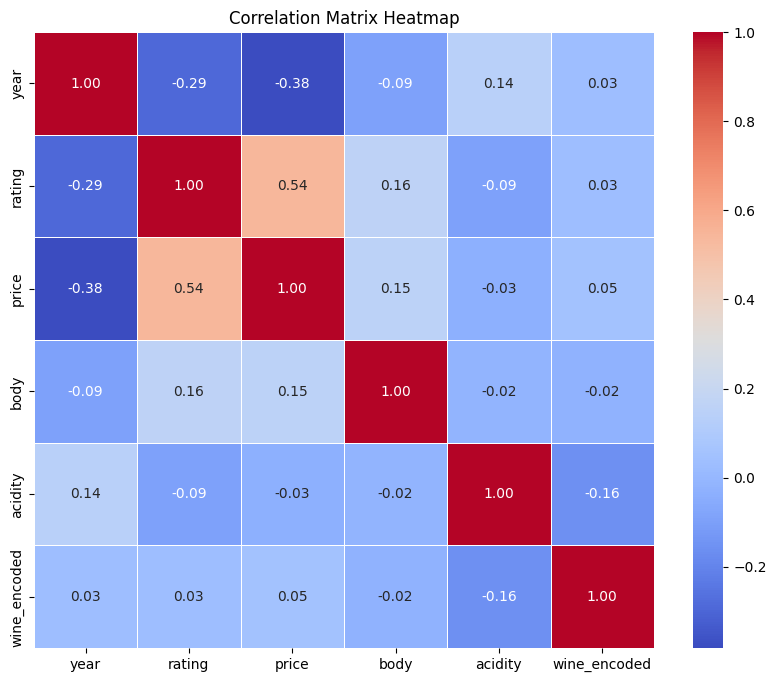

In [46]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [47]:
df

,year,rating,price,body,acidity,wine_encoded
0,-0.058537,5.465322,6.217909,1.570221,0.234120,1.257290
1,0.674395,5.465322,1.685354,-0.295595,-4.151132,1.516454
2,-0.644882,4.618073,1.761506,1.570221,0.234120,1.339359
3,-2.110745,4.618073,4.209086,1.570221,0.234120,1.339359
4,-2.550504,4.618073,4.775073,1.570221,0.234120,1.339359
...,...,...,...,...,...,...
7495,0.381222,-0.465422,-0.266804,-0.295595,0.234120,0.652574
7496,0.674395,-0.465422,-0.288220,-0.295595,0.234120,-0.120599
7497,0.527808,-0.465422,-0.237075,-0.295595,0.234120,-0.716676
7498,-0.351709,-0.465422,0.029292,1.570221,0.234120,-0.543900


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [50]:
def train_test_split(df, price, test_size=0.2):
    df = df.sample(frac=1, random_state=1)
    len_data = len(df)
    test_index = int(len_data * test_size)
    X_train = df.iloc[test_index:]
    X_test = df.iloc[:test_index].drop(columns=[price])
    y_train = X_train[price]
    y_test = df.iloc[:test_index][price]
    X_train = X_train.drop(columns=[price])
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = train_test_split(df, 'price')
print("X_train:", X_train)
print("y_train:", y_train)
print("X_test:", X_test)
print("y_test:", y_test)


X_train:           year    rating      body       acidity  wine_encoded
1743 -0.058537  0.381827 -4.027229  2.341202e-01     -1.684222
4475  0.234636 -0.465422  0.000000  1.947443e-15      0.652574
4228 -0.205123 -0.465422 -0.295595  2.341202e-01     -1.230685
6335 -0.351709 -0.465422  1.570221  2.341202e-01     -0.543900
7409  0.234636 -0.465422  1.570221  2.341202e-01     -1.183172
...        ...       ...       ...           ...           ...
905  -0.351709  1.229076 -0.295595  2.341202e-01     -1.265240
5192  0.381222 -0.465422 -0.295595 -4.151132e+00      1.391192
3980  0.674395 -0.465422 -2.161412  2.341202e-01     -1.779249
235  -2.697090  2.923574 -0.295595  2.341202e-01     -0.345208
5157  0.674395 -0.465422 -0.295595  2.341202e-01      1.486219

[6000 rows x 5 columns]
y_train: 1743   -0.256030
4475   -0.283299
4228   -0.211469
6335   -0.058167
7409   -0.147621
          ...   
905    -0.067146
5192   -0.074063
3980   -0.280638
235     8.726212
5157   -0.309370
Name: price, L

In [51]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(6000, 5) (1500, 5) (6000,) (1500,)


In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
models = {}
def train_validate_predict(regressor, x_train, y_train, x_test, y_test, index):
    model = regressor
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    r2 = r2_score(y_test, y_pred)
    models[index] = r2

In [ ]:
model_list = [LinearRegression, Lasso, Ridge, BayesianRidge, DecisionTreeRegressor, LinearSVR, KNeighborsRegressor,
              RandomForestRegressor,GradientBoostingRegressor]
model_names = ['Linear Regression', 'Lasso', 'Ridge', 'Bayesian Ridge', 'Decision Tree Regressor', 'Linear SVR',
               'KNeighbors Regressor', 'Random Forest Regressor','GradientBosstingRegressor']

index = 0
for regressor in model_list:
    train_validate_predict(regressor(), X_train, y_train, X_test, y_test, model_names[index])
    index+=1

In [ ]:
models

{'Linear Regression': 0.1951597654962578,
 'Lasso': -0.0021941725558101144,
 'Ridge': 0.1951598146320498,
 'Bayesian Ridge': 0.1951583238088359,
 'Decision Tree Regressor': 0.7015865852072032,
 'Linear SVR': -0.03208957266383039,
 'KNeighbors Regressor': 0.7918658915316562,
 'Random Forest Regressor': 0.8231690513673763,
 'GradientBosstingRegressor': 0.8083165276847154}